In [14]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from pydub import AudioSegment
import numpy as np

In [34]:
# Instance: record name
# Phase: train, val, or test
def spectrogramify(instance, phase, nperseg=1000):
  # Be sure that your wav file is mono (single channel) and not stereo (dual channel) before trying to do this
  # sound = AudioSegment.from_wav("./nsynth-test/audio/bass_electronic_018-022-100.wav")
  # sound = sound.set_channels(1)
  # sound.export("Mono_1.wav", format="wav")

  dir = "./nsynth-" + str(phase) + "/audio/" + str(instance) + ".wav"
  sample_rate, samples = wavfile.read(dir)
  # frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
  frequencies, times, spectrogram = signal.stft(samples, fs=sample_rate, nperseg=nperseg)

  return sample_rate, frequencies, times, spectrogram

In [48]:
def show_spectro(times, frequencies, spectrogram):
  f = plt.figure()
  f.set_figwidth(10)
  f.set_figheight(8)

  plt.pcolormesh(times, frequencies, np.abs(spectrogram))
  # plt.imshow(spectrogram)
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.ylim([0, 2000])
  plt.show()

###Vocals or Piano

In [ ]:
# Be sure that your wav file is mono (single channel) and not stereo (dual channel) before trying to do this
sound = AudioSegment.from_wav("No_Time_Piano.wav")
sound = sound.set_channels(1)
sound.export("Mono_2.wav", format="wav")

sample_rate_2, samples_2 = wavfile.read("Mono_2.wav")
# frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
frequencies_2, times_2, spectrogram_2 = signal.stft(samples_2, fs=sample_rate_2, nperseg=10000)

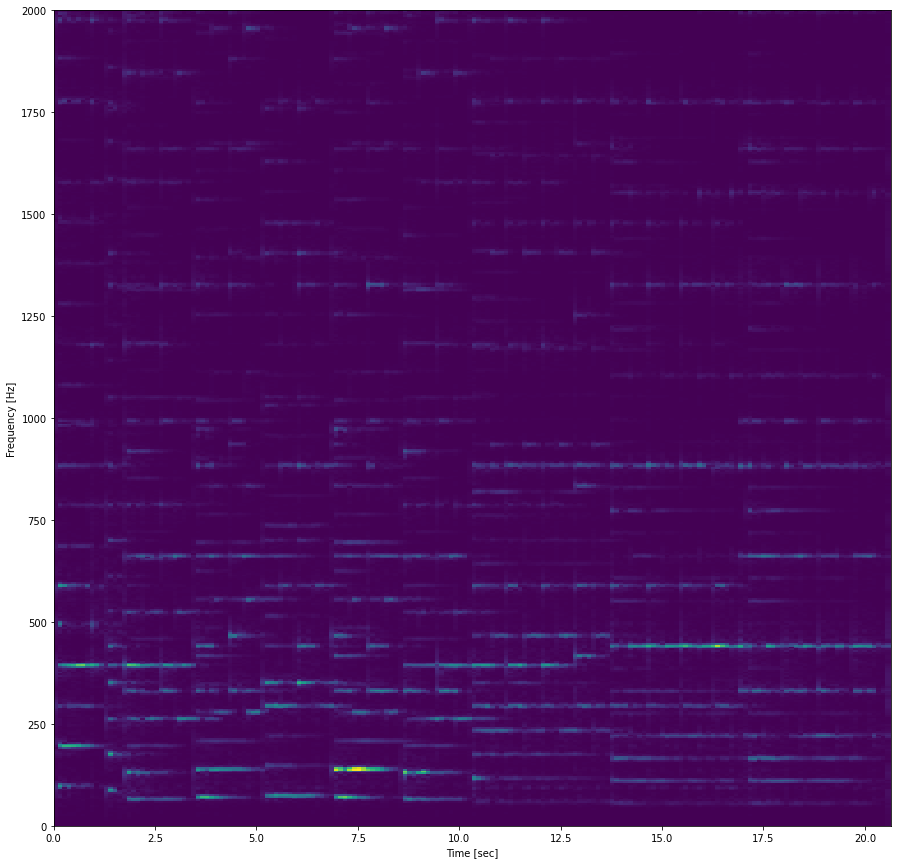

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)

plt.pcolormesh(times_2, frequencies_2, np.abs(spectrogram_2))
# plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 2000])
plt.show()

In [ ]:
spectrogram_new = spectrogram - spectrogram_2

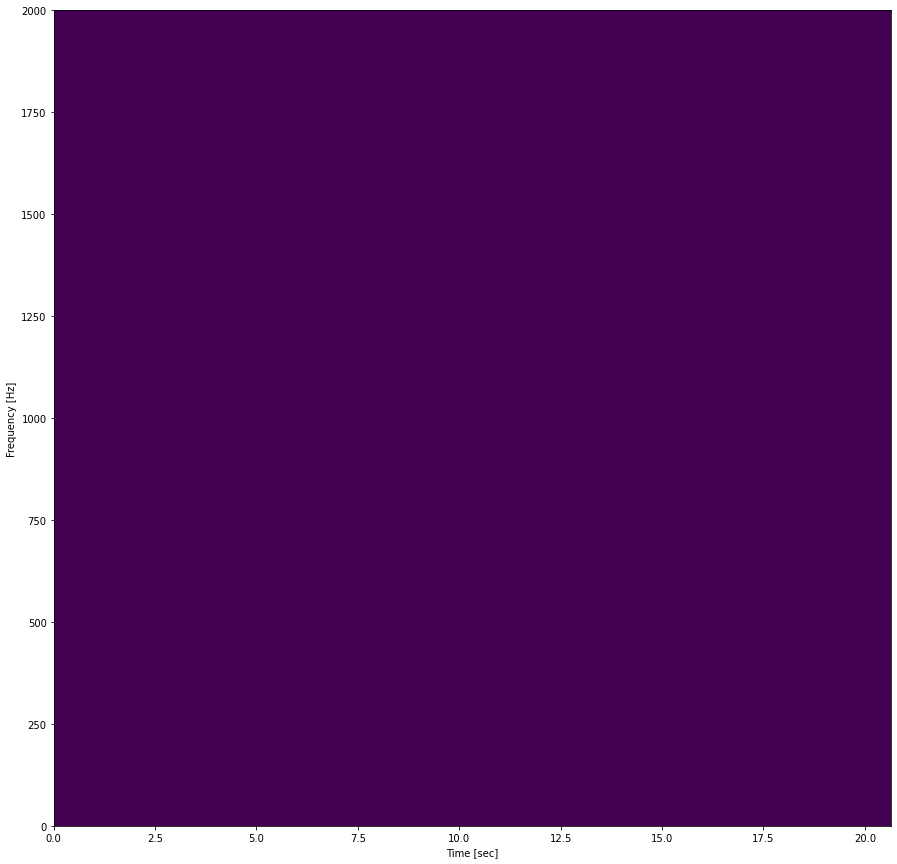

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)

plt.pcolormesh(times_2, frequencies_2, np.abs(spectrogram_new))
# plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 2000])
plt.show()

In [ ]:
_, gen = signal.istft(spectrogram_new, sample_rate)

wavfile.write("output.wav", sample_rate, gen.astype(np.int16))

##Processing/Cleaning

In [ ]:
print(len(times), len(frequencies))
print(spectrogram.shape)

183 5001
(5001, 183)


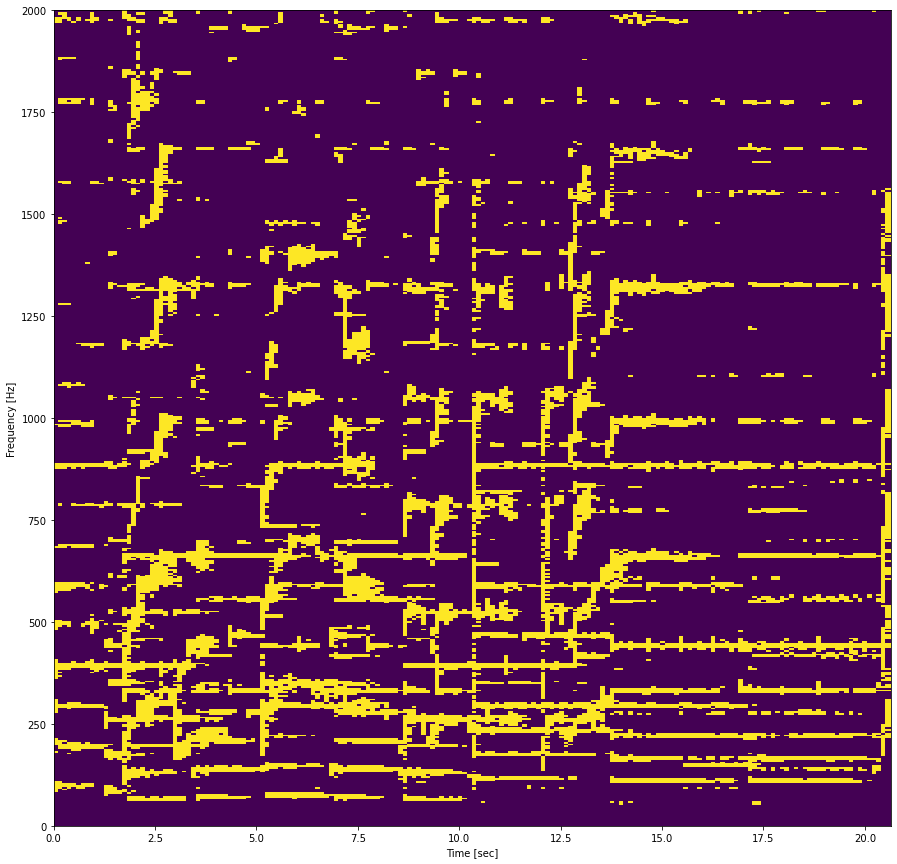

In [ ]:
spec = np.where(np.abs(spectrogram) >= 100, spectrogram, 0) # Isolate audio
spec = np.where(np.abs(spec) <= 100, spec, 100) # Isolate audio
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)

plt.pcolormesh(times, frequencies, np.abs(spec))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([0, 2000])
plt.show()

In [ ]:
_, gen = signal.istft(spec, sample_rate)

wavfile.write("output.wav", sample_rate, gen.astype(np.int16))

##Dataset: NSynth

In [1]:
# Import TEST data - must change this to TRAIN in future (for size reasons changed now)
!wget http://download.magenta.tensorflow.org/datasets/nsynth/nsynth-test.jsonwav.tar.gz

--2022-11-10 19:10:46--  http://download.magenta.tensorflow.org/datasets/nsynth/nsynth-test.jsonwav.tar.gz
Resolving download.magenta.tensorflow.org (download.magenta.tensorflow.org)... 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to download.magenta.tensorflow.org (download.magenta.tensorflow.org)|142.250.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 349501546 (333M) [application/gzip]
Saving to: ‘nsynth-test.jsonwav.tar.gz’

nsynth-test.jsonwav 100%[===================>] 333.31M  61.9MB/s    in 5.6s    

2022-11-10 19:10:52 (59.2 MB/s) - ‘nsynth-test.jsonwav.tar.gz’ saved [349501546/349501546]



In [ ]:
!tar -xzvf "./nsynth-test.jsonwav.tar.gz"

In [36]:
import pandas as pd

df = pd.read_json("./nsynth-test/examples.json", orient='index')
df.head()

,qualities,pitch,note,instrument_source_str,velocity,instrument_str,instrument,sample_rate,qualities_str,instrument_source,note_str,instrument_family,instrument_family_str
bass_synthetic_068-049-025,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",49,217499,synthetic,25,bass_synthetic_068,656,16000,[dark],2,bass_synthetic_068-049-025,0,bass
keyboard_electronic_001-021-127,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",21,299359,electronic,127,keyboard_electronic_001,40,16000,[],1,keyboard_electronic_001-021-127,4,keyboard
guitar_acoustic_010-066-100,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",66,72288,acoustic,100,guitar_acoustic_010,219,16000,[],0,guitar_acoustic_010-066-100,3,guitar
reed_acoustic_037-068-127,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",68,22259,acoustic,127,reed_acoustic_037,387,16000,[reverb],0,reed_acoustic_037-068-127,7,reed
flute_acoustic_002-077-100,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",77,72001,acoustic,100,flute_acoustic_002,86,16000,[reverb],0,flute_acoustic_002-077-100,2,flute


In [37]:
data = df.drop(columns=["instrument_str", "note_str", "instrument_family_str"])
data.head()

,qualities,pitch,note,instrument_source_str,velocity,instrument,sample_rate,qualities_str,instrument_source,instrument_family
bass_synthetic_068-049-025,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",49,217499,synthetic,25,656,16000,[dark],2,0
keyboard_electronic_001-021-127,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",21,299359,electronic,127,40,16000,[],1,4
guitar_acoustic_010-066-100,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",66,72288,acoustic,100,219,16000,[],0,3
reed_acoustic_037-068-127,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",68,22259,acoustic,127,387,16000,[reverb],0,7
flute_acoustic_002-077-100,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",77,72001,acoustic,100,86,16000,[reverb],0,2


In [46]:
y = []
for instance in data.index:
  sample_rate, frequencies, times, spectrogram = spectrogramify(instance, "test")
  y.append({"spectrogram": spectrogram, "sample_rate": sample_rate, "freq": frequencies, "times": times})

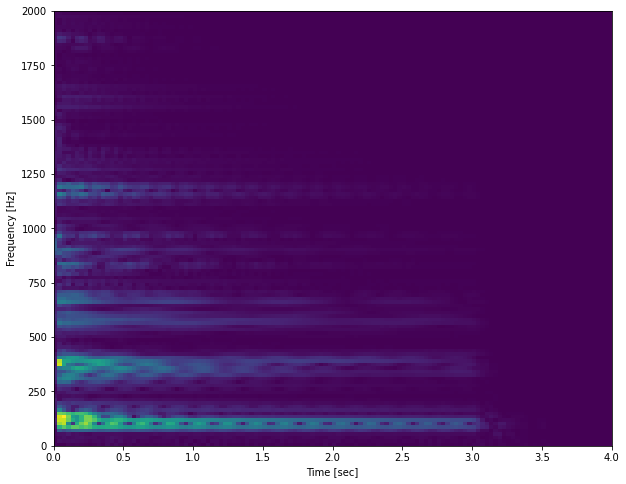

In [52]:
r = 1
show_spectro(y[r]["times"], y[r]["freq"], y[r]["spectrogram"])